# Dataset evaluation

Author: Frankie Inguanez <br/>
Date: 15/01/2023<br/><br/>

An evaluation of the dataset

In [1]:
class SudokuExecutor:
    def __init__(self, puzzlesFileName: str, trackingFileName:str, statsFileName: str, errorsFileName: str, offset: int, limit: int):
        self.puzzlesFileName=puzzlesFileName
        self.trackingFileName=trackingFileName
        self.statsFileName=statsFileName
        self.errorsFileName=errorsFileName
        self.offset=offset
        self.limit=limit

class SudokuConfig:
    def __init__(self, searchMode: int, guessMode: int, tracking: bool):
        self.searchMode=searchMode
        self.guessMode=guessMode
        self.tracking=tracking

class SudokuStats:
    def __init__(self):
        self.guesses = 0
        self.backtracks = 0
        self.executionTime = None
        self.unknowns = 0

    def incrementGuesses(self):
        self.guesses += 1

    def incrementBacktracks(self):
        self.backtracks += 1

    def registerExecutionTime(self, executionTime):
        self.executionTime=executionTime

    def setUnknowns(self, zeros:int):
        self.unknowns=zeros

def getFileLineCount(fileName: str):
    """
    Get number of lines in a file.
    Arguments:
        fileName: the name of the file to process.
    """
    import mmap

    lines = 0
    with open(fileName, "r+", encoding="utf-8") as f:
        bf = mmap.mmap(f.fileno(), 0)

        while bf.readline():
            lines += 1

    return lines
    
def saveError(error, errorsFileName: str):
    """
    Saves an error/exception that is raised.
    Arguments:
        error: the Exception that is raised.
        errorsFileName: the file name where the error will be saved.
    """
    try:
        with open(errorsFileName, "a", encoding="utf-8") as ef:
            ef.write("Encountered error:\n{}\n{}\n{}\n\n".format(type(error), error.args, error))
    except Exception as e:
        # Failed to save error to file
        print("Failed to save original error to file due to:\n{}\n{}\n{}\n\n".format(type(e), e.args, e))
        print("Original error:\n{}\n{}\n{}\n\n".format(type(error), error.args, error))
        
def to2DArray(n: str):
    """
    Convert a string to a 2D 9x9 array.
    Arguments:
        n: an 81 digits in string format.
    """
    return [list(map(int, n[i:i+9])) for i in range(0, 81, 9)]

def toStr(puzzle):
    """
    Converts a puzzle to a string.
    Arguments:
        puzzle: a 2 dimensional array representing the 9x9 puzzle. 
    """
    r = ""

    for row in puzzle:
        r += "".join(map(str, row))

    return r

def getColValues(puzzle, col: int):
    """
    Get column values.
    Arguments:
        puzzle: a 2 dimensional array representing the 9x9 puzzle. 
        col: the column number.
    """
    lst = []
    for row in puzzle:
        lst.append(row[col])

    return lst;

def getBoxValues(puzzle, box: int):
    """
    Get box values. Boxes are 3x3 sub-grids enumerates from top left in a raster fashion
    0, 1, 2
    3, 4, 5
    6, 7, 8
    Arguments:
        puzzle: a 2 dimensional array representing the 9x9 puzzle.
        box: the box identification number.
    """
    return [puzzle[x][y] for x in range((box//3)*3,((box//3)*3)+3) for y in range((box%3)*3, ((box%3)*3)+3)]

def checkList(lst: list):
    """
    Checks if a list contains all numbers from 1 to 9.
    Arguments:
        lst: the list of numbers.
    """
    return set(lst) == set(range(1,10))

def isSolved(puzzle):
    """
    Check if a puzzle has been solved.
    Arguments:
        puzzle: a 2 dimensional array representing the 9x9 puzzle.
    """

    # Check rows
    for row in puzzle:
        if not checkList(row):
            return False

    # Check columns
    for i in range(0,9):
        if not checkList(getColValues(puzzle, i)):
            return False;

    # Check box
    for i in range(0,9):
        if not checkList(getBoxValues(puzzle, i)):
            return False;

    return True

def isValid(puzzle, num: int, pos):
    """
    Checks if a number can be added to a specific position
    Arguments:
        puzzle: a 2 dimensional array representing the 9x9 puzzle.
        num: the number to insert.
        pos: the row and column position to place the digit.
    """
    
    # Check the row
    for i in range(len(puzzle[0])):
        if puzzle[pos[0]][i]==num and pos[1] != i:
            return False

    # Check the column
    for i in range(len(puzzle[1])):
        if puzzle[i][pos[1]]==num and pos[0] != i:
            return False

    # Check box
    box_x = pos[1] // 3
    box_y = pos[0] // 3

    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if puzzle[i][j] == num and (i,j) != pos:
                return False

    return True

In [2]:
# Import packages and variable declaration
import tqdm

puzzlesFileName = "../data/mypuzzles.csv"

In [3]:
# Prepare the dictionary
zeros = {}
for i in range(0,81):
    zeros[i] = 0

# Read the puzzles file
with open(puzzlesFileName, "r", encoding="utf-8") as pf:
    for line in tqdm.tqdm(pf, total=getFileLineCount(puzzlesFileName)):
        # Parse the content
        data = line.split(',')
        puzzle = data[1].strip()

        # Count the number of zeros
        zeroCount = puzzle.count('0')
        zeros[zeroCount] += 1      

100%|██████████| 8400/8400 [00:00<00:00, 763625.51it/s]


In [4]:
zeros

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 3,
 37: 11,
 38: 22,
 39: 67,
 40: 109,
 41: 128,
 42: 137,
 43: 251,
 44: 171,
 45: 249,
 46: 203,
 47: 164,
 48: 290,
 49: 744,
 50: 826,
 51: 466,
 52: 437,
 53: 615,
 54: 725,
 55: 1594,
 56: 862,
 57: 302,
 58: 23,
 59: 1,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0}

In [5]:
stats = {}
for i in range(0,81):
    if zeros[i]==0:
        continue

    stats[i]=zeros[i]

In [6]:
stats

{36: 3,
 37: 11,
 38: 22,
 39: 67,
 40: 109,
 41: 128,
 42: 137,
 43: 251,
 44: 171,
 45: 249,
 46: 203,
 47: 164,
 48: 290,
 49: 744,
 50: 826,
 51: 466,
 52: 437,
 53: 615,
 54: 725,
 55: 1594,
 56: 862,
 57: 302,
 58: 23,
 59: 1}

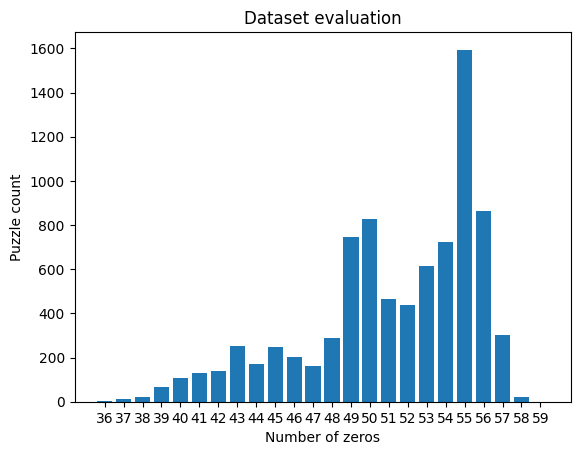

In [7]:
from matplotlib import pyplot as plt

plt.bar(range(len(stats)), list(stats.values()), align='center')
plt.xticks(range(len(stats)), list(stats.keys()))
plt.xlabel("Number of zeros")
plt.ylabel("Puzzle count")
plt.title("Dataset evaluation")

plt.show()

In [8]:
buckets = {0:0, 1:0, 2:0, 3:0, 4:0}

for i in list(stats.keys()):
    if (81-i)>46:
        buckets[0]+=stats[i]
    elif (81-i)>=36:
        buckets[1]+=stats[i]
    elif (81-i)>=32:
        buckets[2]+=stats[i]
    elif (81-i)>=28:
        buckets[3]+=stats[i]
    else: buckets[4]+=stats[i]

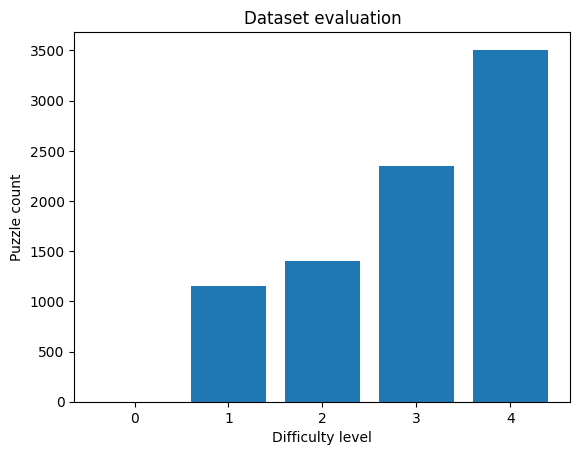

In [9]:
plt.bar(range(len(buckets)), list(buckets.values()), align='center')
plt.xticks(range(len(buckets)), list(buckets.keys()))
plt.xlabel("Difficulty level")
plt.ylabel("Puzzle count")
plt.title("Dataset evaluation")

plt.show()